# Short beam Quantum Radiation Reaction

In [1]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *

In [2]:
# parameters
# laser
lbd = 0.8; #[\mu m]
a0 = 100 #[]
W0 = 2.4; #[\mu m]
zR = pi*W0**2/lbd; #[\mu m]
# beam
g0 = 5000; #[]
R = W0; #[\mu m]
lonrise = 50 #[1/wp]

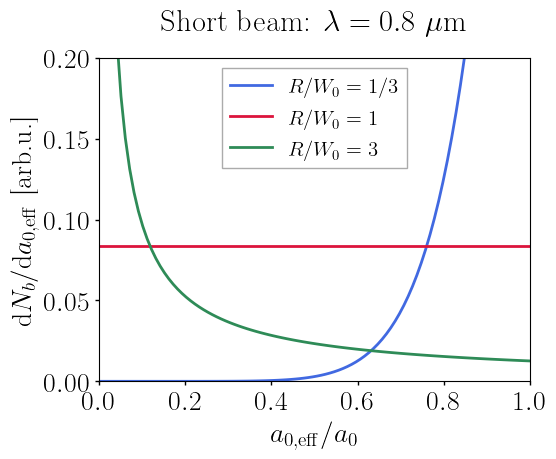

In [3]:
# plot 
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

a0lst2 = np.linspace(1e-2,12,100)
R=W0/3
dNda03 = (W0/R)**2/a0lst2 * (a0lst2/np.max(a0lst2))**((W0/R)**2)
R=W0
dNda10 = (W0/R)**2/a0lst2 * (a0lst2/np.max(a0lst2))**((W0/R)**2)
R=W0*3
dNda30 = (W0/R)**2/a0lst2 * (a0lst2/np.max(a0lst2))**((W0/R)**2)# plot 

plt.plot(a0lst2/12, dNda03/np.trapz(dNda03,a0lst2), color='royalblue', label=r'$R/W_0=1/3$')
plt.plot(a0lst2/12, dNda10/np.trapz(dNda10,a0lst2), color='crimson', label=r'$R/W_0=1$')
plt.plot(a0lst2/12, dNda30/np.trapz(dNda30,a0lst2), color='seagreen', label=r'$R/W_0=3$')
#'crimson', 'tomato', 'orange', 'seagreen','royalblue', 'navy'

plt.legend(loc='upper center',ncol=1)
plt.ylim([0,0.2])
plt.xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
plt.ylabel(r'$\mathrm{d}N_b/\mathrm{d}a_{0,\mathrm{eff}}$ [arb.u.]')

plt.title(r'Short beam: $\lambda=0.8~\mu\mathrm{m}$')
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
#plt.yscale('log')

# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
#axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
axes.set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
#plt.savefig('PW_photons_a0eff.pdf',transparent=True)
plt.show()

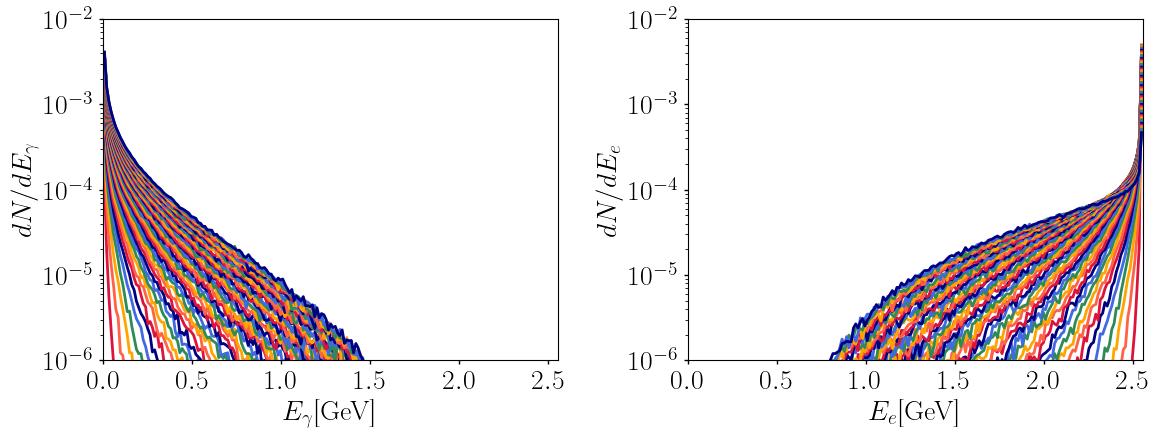

In [4]:
# plot all PW spectra

# plot 
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# da = 0.2
files_electrons = glob.glob('PW/a*-electrons-*103.h5')
files_electrons.sort()
enelst = np.linspace(1,5000,200)
enedist_electrons = np.zeros((len(files_electrons),len(enelst)-1))
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])*-1

    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_electrons[i,:] = enedist_sim_y1
    axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1)
axes[1].set_yscale('log')
axes[1].set_ylim([1e-6,1e-2])
#plt.legend(loc='upper left')
axes[1].set_xlim([0,5000*(0.511e6)*1e-9])
#plt.ylim([0,90])
axes[1].set_xlabel(r'$E_e$[GeV]')
axes[1].set_ylabel(r'$dN/dE_e$')
#axes[1].title(r'Plane Wave electron distribution')
axes[1].set_xticks([0,0.5,1,1.5,2,2.5])

files = glob.glob('PW/a*-photons-*103.h5')
files.sort()
enedist_photons = np.zeros_like(enedist_electrons)
for i in range(len(files)):
    filef = h5py.File(files[i], 'r')
    enedist = np.array(filef['ene'])
    #print(np.max(enedist))
    qdist = np.array(filef['q'])

    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_photons[i,:] = enedist_sim_y1
    axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1)
axes[0].set_yscale('log')
axes[0].set_ylim([1e-6,1e-2])
#plt.legend(loc='upper left')
#plt.xlim([0.5,3.5])
#plt.ylim([0,90])
axes[0].set_xlim([0,5000*(0.511e6)*1e-9])
axes[0].set_xlabel(r'$E_\gamma$[GeV]')
axes[0].set_ylabel(r'$dN/dE_\gamma$')
#axes[0].title(r'Plane Wave photon distribution')
axes[0].set_xticks([0,0.5,1,1.5,2,2.5])

# aspect
for i in range(2):
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    #axesratio = (ymax-ymin)/(xmax-xmin)
    axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
    axes[i].set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
#plt.savefig('PWallDatasets.pdf',transparent=True)
plt.show()

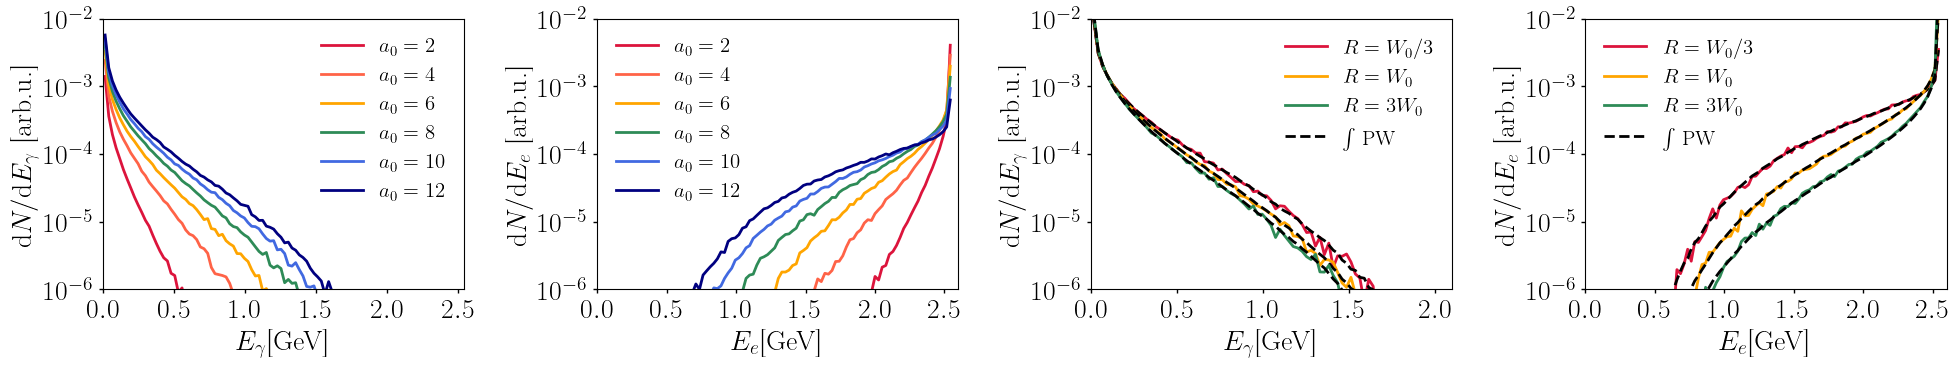

In [6]:
# 3D integrated photons 
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))

a0lst = np.arange(0.2,12.1,0.2)
enelst = np.linspace(1,5000,100)

# 1D Photons
files = glob.glob('PW/a*RAW-photons-000103.h5')
files.sort()
enedist_electrons = np.zeros((len(files),len(enelst)-1))
enedist_photons = np.zeros_like(enedist_electrons)
for i in range(len(files)):
    filef = h5py.File(files[i], 'r')
    enedist = np.array(filef['ene'])
    #print(np.max(enedist))
    qdist = np.array(filef['q'])
    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_photons[i,:] = enedist_sim_y1
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[9,:], label=r'$a_0=2$')
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[19,:], label=r'$a_0=4$')
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[29,:], label=r'$a_0=6$')
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[39,:], label=r'$a_0=8$')
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[49,:], label=r'$a_0=10$')
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[59,:], label=r'$a_0=12$')
#
axes[0].set_yscale('log')
axes[0].legend(loc='upper right', frameon=False)
axes[0].set_xlabel(r'$E_\gamma$[GeV]')
axes[0].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_\gamma$ [arb.u.]')
#axes[0].title(r'PW: $\gamma_e=5000, \lambda=0.8\mu\mathrm{m}, \tau_\mathrm{rise} = 50\omega_p^{-1} $')
axes[1].set_xlim([0,2.6])
axes[0].set_xticks([0,0.5,1,1.5,2,2.5])
axes[0].set_ylim([1e-6,1e-2])
axes[0].set_yticks([1e-6,1e-5,1e-4,1e-3,1e-2])

# 1D electrons
files = glob.glob('PW/a*RAW-electrons-000103.h5')
files.sort()
for i in range(len(files)):
    filef = h5py.File(files[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])*-1
    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_electrons[i,:] = enedist_sim_y1
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_electrons[9,:], label=r'$a_0=2$')
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_electrons[19,:], label=r'$a_0=4$')
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_electrons[29,:], label=r'$a_0=6$')
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_electrons[39,:], label=r'$a_0=8$')
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_electrons[49,:], label=r'$a_0=10$')
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_electrons[59,:], label=r'$a_0=12$')
axes[1].set_yscale('log') 
axes[1].legend(loc='upper left', frameon=False)
axes[1].set_xlabel(r'$E_e$[GeV]')
axes[1].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_e$ [arb.u.]')
#axes[1].title(r'PW: $\gamma_e=5000, \lambda=0.8\mu\mathrm{m}, \tau_\mathrm{rise} = 50\omega_p^{-1} $')
axes[1].set_xlim([0,2.6])
axes[1].set_xticks([0,0.5,1,1.5,2,2.5])
axes[1].set_ylim([1e-6,1e-2])
axes[1].set_yticks([1e-6,1e-5,1e-4,1e-3,1e-2])

# 3D photons
file0 = h5py.File('Gaussian/RW0_03_RAW-photons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW03 = enedist[qdist>0]
qdist_RW03 = np.abs( qdist[qdist>0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW03,enelst,weights=qdist_RW03)
enedist_y_RW03, enedist_x_RW03 = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0/3
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in range(len(files)):
    dNdg = dNdg + dNda[i] * enedist_photons[i,:]
dNdg_RW03 = dNdg/np.sum(dNda)
axes[2].plot(enedist_x_RW03*(0.511e6)*1e-9, enedist_y_RW03/np.trapz(enedist_y_RW03,enedist_x_RW03), color='crimson', label=r'$R=W_0/3$')
axes[2].plot(enedist_x_RW03*(0.511e6)*1e-9, dNdg_RW03/np.trapz(dNdg_RW03,enedist_x_RW03), 'k--')
#
file0 = h5py.File('Gaussian/RW0_10_RAW-photons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW10 = enedist[qdist>0]
qdist_RW10 = np.abs( qdist[qdist>0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW10,enelst,weights=qdist_RW10)
enedist_y_RW10, enedist_x_RW10 = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in range(len(files)):
    dNdg = dNdg + dNda[i] * enedist_photons[i,:]
dNdg_RW10 = dNdg/np.sum(dNda)
axes[2].plot(enedist_x_RW10*(0.511e6)*1e-9, enedist_y_RW10/np.trapz(enedist_y_RW10,enedist_x_RW10), color='orange', label=r'$R=W_0$')
axes[2].plot(enedist_x_RW10*(0.511e6)*1e-9, dNdg_RW10/np.trapz(dNdg_RW10,enedist_x_RW10), 'k--')
#
file0 = h5py.File('Gaussian/RW0_30_RAW-photons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW30 = enedist[qdist>0]
qdist_RW30 = np.abs( qdist[qdist>0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW30,enelst,weights=qdist_RW30)
enedist_y_RW30, enedist_x_RW30 = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0*3
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in range(len(files)):
    dNdg = dNdg + dNda[i] * enedist_photons[i,:]
dNdg_RW30 = dNdg/np.sum(dNda)
axes[2].plot(enedist_x_RW30*(0.511e6)*1e-9, enedist_y_RW30/np.trapz(enedist_y_RW30,enedist_x_RW30), color='seagreen', label=r'$R=3W_0$')
axes[2].plot(enedist_x_RW30*(0.511e6)*1e-9, dNdg_RW30/np.trapz(dNdg_RW30,enedist_x_RW30), 'k--', label=r'$\int$ PW')
axes[2].set_yscale('log')
axes[2].legend(loc='upper right', frameon=False)
axes[2].set_xlabel(r'$E_\gamma$[GeV]')
axes[2].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_\gamma$ [arb.u.]')
#axes[2].title(r'Gaussian LP: $\gamma_e=5000, \lambda=0.8~\mu\mathrm{m} \newline a_0=12, \tau_\mathrm{rise}=50 ~\omega_p^{-1},\Delta_\bot=0 ~R$')
axes[2].set_xticks([0,0.5,1,1.5,2,2.5])
axes[2].set_xlim([0,2.1])
axes[2].set_ylim([1e-6,1e-2])
axes[2].set_yticks([1e-6, 1e-5,1e-4,1e-3,1e-2])

# 3D integrated electrons
file0 = h5py.File('Gaussian/RW0_03_RAW-electrons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW03e = enedist[qdist<0]
qdist_RW03e = np.abs( qdist[qdist<0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW03e,enelst,weights=qdist_RW03e)
enedist_y_RW03e, enedist_x_RW03e = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0/3
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in range(len(files)):
    dNdg = dNdg + dNda[i] * enedist_electrons[i,:]
dNdg_RW03e = dNdg/np.sum(dNda)
axes[3].plot(enedist_x_RW03e*(0.511e6)*1e-9, enedist_y_RW03e/np.trapz(enedist_y_RW03e,enedist_x_RW03e), '-', color='crimson', label=r'$R=W_0/3$', linewidth=2)
axes[3].plot(enedist_x_RW03e*(0.511e6)*1e-9, dNdg_RW03e/np.trapz(dNdg_RW03e,enedist_x_RW03e), 'k--')
#
file0 = h5py.File('Gaussian/RW0_10_RAW-electrons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW10e = enedist[qdist<0]
qdist_RW10e = np.abs( qdist[qdist<0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW10e,enelst,weights=qdist_RW10e)
enedist_y_RW10e, enedist_x_RW10e = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in range(len(files)):
    dNdg = dNdg + dNda[i] * enedist_electrons[i,:]
dNdg_RW10e = dNdg/np.sum(dNda)
axes[3].plot(enedist_x_RW10e*(0.511e6)*1e-9, enedist_y_RW10e/np.trapz(enedist_y_RW10e,enedist_x_RW10e), color='orange', label=r'$R=W_0$')
axes[3].plot(enedist_x_RW10e*(0.511e6)*1e-9, dNdg_RW10e/np.trapz(dNdg_RW10e,enedist_x_RW10e), 'k--')
#
file0 = h5py.File('Gaussian/RW0_30_RAW-electrons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW30e = enedist[qdist<0]
qdist_RW30e = np.abs( qdist[qdist<0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW30e,enelst,weights=qdist_RW30e)
enedist_y_RW30e, enedist_x_RW30e = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0*3
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in range(len(files)):
    dNdg = dNdg + dNda[i] * enedist_electrons[i,:]
dNdg_RW30e = dNdg/np.sum(dNda)
axes[3].plot(enedist_x_RW30e*(0.511e6)*1e-9, enedist_y_RW30e/np.trapz(enedist_y_RW30e,enedist_x_RW30e)*2, color='seagreen', label=r'$R=3W_0$')
axes[3].plot(enedist_x_RW30e*(0.511e6)*1e-9, dNdg_RW30e/np.trapz(dNdg_RW30e,enedist_x_RW30e), 'k--', label=r'$\int$ PW')
#
axes[3].set_yscale('log')
axes[3].legend(loc='upper left', frameon=False)
axes[3].set_xlabel(r'$E_e$[GeV]')
axes[3].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_e$ [arb.u.]')
#axes[3].set_title(r'Gaussian LP: $\gamma_e=5000, \lambda=0.8~\mu\mathrm{m} \newline a_0=12, \tau_\mathrm{rise}=50 ~\omega_p^{-1},\Delta_\bot=0 ~R$')
axes[3].set_xticks([0,0.5,1,1.5,2,2.5])
axes[3].set_xlim([0,2.6])
axes[3].set_ylim([1e-6,1e-2])
axes[3].set_yticks([1e-6, 1e-5,1e-4,1e-3,1e-2])


# aspect
for i in range(4):
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    #axesratio = (ymax-ymin)/(xmax-xmin)
    axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
    axes[i].set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
plt.savefig('GaussianQRR.pdf', transparent=True)
plt.show()